## KNN - HW0 ML

Supervised learning algorithm used for both classification & regression. Instance-based learning(lazy).
To make it more efficient, we store the points in a ***KD-tree***. 

In [72]:
import numpy as np
from scipy.spatial import KDTree
from sklearn.datasets import load_iris

from typing import List, Dict

iris = load_iris()

# print(type(iris.data))
print(iris.feature_names)
# iris.data


['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [73]:
import pandas as pd

iris_df: pd.DataFrame = pd.DataFrame(data=np.c_[iris['data'], iris['target']],
                                     columns=iris['feature_names'] + ['target'])
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


In [74]:

iris_df.describe() # general statistics

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [75]:
def calc_euclidean_distance(point1: np.ndarray, 
                            point2: np.ndarray) -> float:
    return np.sqrt(np.sum(np.power(point1 - point2, 2)))


## Implementing KNN with KD-tree

In [76]:
class KNNModel:

    def __init__(self, k: int, 
                 train_data: np.ndarray, train_targets: np.ndarray) -> None:
        self.k: int = k
        self.tree: KDTree = KDTree(train_data)
        self.targets: np.ndarray = train_targets

    def vote(self, query_point: np.ndarray) -> int:
        _, nearest_neighbour_indices = self.tree.query(query_point, k=self.k) 
        classes_cnt: List[int] = [0, 0, 0]
        
        if self.k == 1:
            nearest_neighbour_indices = [nearest_neighbour_indices] # otherwise it's a scalar
            
        for ind in nearest_neighbour_indices:
            c: int = int(self.targets[int(ind)])
            classes_cnt[c] += 1

        return classes_cnt.index(max(classes_cnt)) 

    
    def accuracy(self, points: np.ndarray, targets: np.ndarray) -> float:
        
        mistakes: int = 0

        for query_point, point_class in zip(points, targets):

            est_class: int = self.vote(query_point)
            mistakes = mistakes if est_class == int(point_class) else mistakes + 1

        return 1 - mistakes / len(points)





### Testing accuracy

In [77]:
perm: np.ndarray = np.random.permutation(len(iris.data))

x_train: np.ndarray = iris.data[perm]
y_train: np.ndarray = iris.target[perm]

model: KNNModel = KNNModel(5, x_train, y_train)
print(model.accuracy(x_train, y_train))

0.9666666666666667


#### 10-fold cross-validation

To test the algorithm, 10-fold cross-validation is applied  
* divides the data randomly into 10 sets 
* does 10 trainings \& tests of the model each time using one of the sets for testing and the other 9 for traning 

In [78]:
def cross_validation_accuracy(k: int, 
                              data: np.ndarray, target: np.ndarray) -> float:
    temp_sum: float = 0
    num_chunks: int = 10
    chunk_size: int = len(data) // num_chunks
    
    perm: np.ndarray = np.random.permutation(len(data))

    x: np.ndarray = data[perm]
    y: np.ndarray = target[perm]

    for i in range(0, num_chunks):
        begin: int = i * num_chunks
        end: int = begin + chunk_size

        x_train: np.ndarray = np.concatenate((x[0:begin], x[end:]))
        y_train: np.ndarray = np.concatenate((y[0:begin], y[end:]))
        x_test: np.ndarray = x[begin:end]
        y_test: np.ndarray = y[begin:end]

        m: KNNModel = KNNModel(k, x_train, y_train)
        temp_sum += m.accuracy(x_test, y_test)

    return temp_sum / num_chunks

### Finding the best k value

In [79]:
import seaborn as sns
import matplotlib.pyplot as plt

In [80]:
k_vals: range = list(range(1, 30, 1))
accuracy_k = [cross_validation_accuracy(k, iris.data, iris.target) for k in k_vals]


for k, val in zip(k_vals, accuracy_k) :
    print(f"Accuracy of model: {val} | k = {k}")

best_id: int = accuracy_k.index(max(accuracy_k,))
print(f"\nBest accuracy was {accuracy_k[best_id]} for k = {k_vals[best_id]}")

Accuracy of model: 0.9866666666666667 | k = 1
Accuracy of model: 0.9600000000000002 | k = 2
Accuracy of model: 0.9666666666666668 | k = 3
Accuracy of model: 0.9266666666666665 | k = 4
Accuracy of model: 0.9733333333333334 | k = 5
Accuracy of model: 0.9733333333333334 | k = 6
Accuracy of model: 0.9400000000000002 | k = 7
Accuracy of model: 0.9666666666666668 | k = 8
Accuracy of model: 0.9600000000000002 | k = 9
Accuracy of model: 0.9800000000000001 | k = 10
Accuracy of model: 0.9400000000000001 | k = 11
Accuracy of model: 0.9866666666666667 | k = 12
Accuracy of model: 0.9666666666666668 | k = 13
Accuracy of model: 0.9600000000000002 | k = 14
Accuracy of model: 0.9600000000000002 | k = 15
Accuracy of model: 0.9800000000000001 | k = 16
Accuracy of model: 0.9666666666666668 | k = 17
Accuracy of model: 0.9933333333333334 | k = 18
Accuracy of model: 0.9733333333333334 | k = 19
Accuracy of model: 0.9666666666666668 | k = 20
Accuracy of model: 0.9466666666666669 | k = 21
Accuracy of model: 0.9

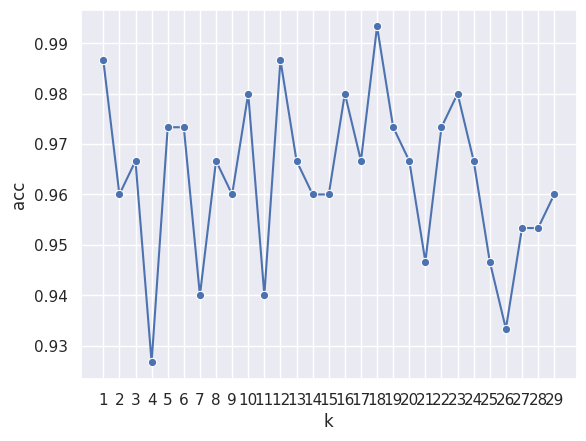

In [81]:
sns.set(style='darkgrid')
ax = sns.lineplot(x='k', y='acc', 
                  data=pd.DataFrame({'k': k_vals, 'acc': accuracy_k}),
                  marker='o')
ax.set(xticks=k_vals)

plt.show()

### With data normalization

In [82]:
from sklearn.preprocessing import Normalizer


def cross_validation_accuracy_norm(k: int, 
                                   data: np.ndarray, target: np.ndarray) -> float:
    temp_sum: float = 0
    num_chunks: int = 10
    chunk_size: int = len(data) // num_chunks
    
    perm: np.ndarray = np.random.permutation(len(data))

    x: np.ndarray = data[perm]
    y: np.ndarray = target[perm]

    for i in range(0, num_chunks):
        begin: int = i * num_chunks
        end: int = begin + chunk_size

        x_train: np.ndarray = np.concatenate((x[0:begin], x[end:]))
        y_train: np.ndarray = np.concatenate((y[0:begin], y[end:]))
        x_test: np.ndarray = x[begin:end]
        y_test: np.ndarray = y[begin:end]

        scaler = Normalizer().fit(x_train)
        norm_x_train = scaler.transform(x_train)
        norm_x_test = scaler.transform(x_test)

        m: KNNModel = KNNModel(k, norm_x_train, y_train)
        temp_sum += m.accuracy(norm_x_test, y_test)

    return temp_sum / num_chunks


In [83]:
accuracy_k = [cross_validation_accuracy_norm(k, iris.data, iris.target) for k in k_vals]


for k, val in zip(k_vals, accuracy_k) :
    print(f"Accuracy of model: {val} | k = {k}")

best_id: int = accuracy_k.index(max(accuracy_k,))
print(f"\nBest accuracy was {accuracy_k[best_id]} for k = {k_vals[best_id]}")

Accuracy of model: 0.9400000000000001 | k = 1
Accuracy of model: 0.9533333333333334 | k = 2
Accuracy of model: 0.9933333333333334 | k = 3
Accuracy of model: 0.9666666666666668 | k = 4
Accuracy of model: 0.9600000000000002 | k = 5
Accuracy of model: 0.9800000000000001 | k = 6
Accuracy of model: 0.9733333333333334 | k = 7
Accuracy of model: 0.9733333333333334 | k = 8
Accuracy of model: 0.9533333333333334 | k = 9
Accuracy of model: 0.9666666666666668 | k = 10
Accuracy of model: 0.9866666666666667 | k = 11
Accuracy of model: 0.9800000000000001 | k = 12
Accuracy of model: 0.9600000000000002 | k = 13
Accuracy of model: 0.9466666666666669 | k = 14
Accuracy of model: 0.9466666666666669 | k = 15
Accuracy of model: 0.9933333333333334 | k = 16
Accuracy of model: 0.9666666666666666 | k = 17
Accuracy of model: 1.0 | k = 18
Accuracy of model: 1.0 | k = 19
Accuracy of model: 0.9733333333333334 | k = 20
Accuracy of model: 0.9800000000000001 | k = 21
Accuracy of model: 0.9800000000000001 | k = 22
Accur

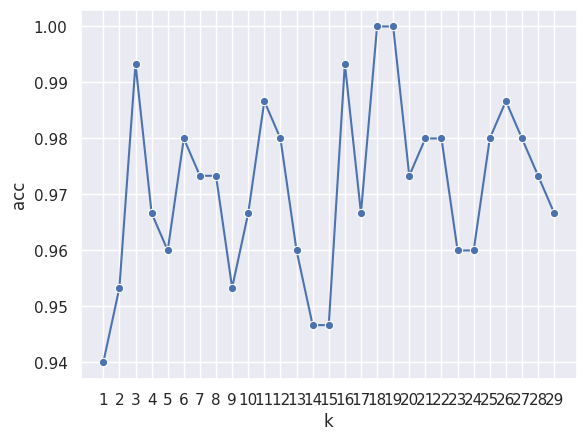

In [84]:
ax = sns.lineplot(x='k', y='acc', 
                  data=pd.DataFrame({'k': k_vals, 'acc': accuracy_k}),
                  marker='o')
ax.set(xticks=k_vals)

plt.show()